<a href="https://colab.research.google.com/github/minsihihi/Fabre/blob/main/%ED%8C%8C%EB%B8%8C%EB%A5%B4_%EC%A1%B8%ED%94%84_%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8B%B1%2C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%88%A0_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [ ]:
%pip install --upgrade openai --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
import json


In [ ]:
from openai import OpenAI
import os

## Set the API key and model name
MODEL="gpt-4o"

from google.colab import userdata

client = OpenAI(api_key=userdata.get('openai'))

In [ ]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me analyze the nutrition data of a photo of my meal"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you analyze the nutrition data of my meal?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Of course! I'd be happy to help. However, I can't see photos or images, so I'll need you to describe the meal to me. Please include details such as the type of dish, the main ingredients, and any notable preparation methods or portion sizes. This way, I can provide you with an estimation of the nutritional content.


### JSON Mode - for function calling

In [ ]:

completion = client.chat.completions.create(
  model=MODEL,
  response_format={"type": "json_object"},
  messages=[
    {"role": "system", "content": "You are a trainer who always respond in JSON"},
    {"role": "user", "content": "Create a weekly workout routine for me"}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "weekly_workout_routine": {\n    "Monday": {\n      "workout": "Full Body Strength Training",\n      "exercises": [\n        {"exercise": "Squats", "sets": 4, "reps": 12},\n        {"exercise": "Bench Press", "sets": 4, "reps": 10},\n        {"exercise": "Bent Over Rows", "sets": 4, "reps": 12},\n        {"exercise": "Deadlifts", "sets": 4, "reps": 10},\n        {"exercise": "Plank", "sets": 3, "duration": "1 minute"}\n      ]\n    },\n    "Tuesday": {\n      "workout": "Cardio and Core",\n      "exercises": [\n        {"exercise": "Running", "duration": "30 minutes"},\n        {"exercise": "Bicycle Crunches", "sets": 4, "reps": 20},\n        {"exercise": "Russian Twists", "sets": 4, "reps": 30},\n        {"exercise": "Leg Raises", "sets": 4, "reps": 15}\n      ]\n    },\n    "Wednesday": {\n      "workout": "Upper Body Strength",\n      "exercises": [\n        {"exercise": "Pull-Ups", "sets": 4, "reps": 8},\n        {"exercise": "Dumbbell Shoulder P

In [ ]:
json.loads(completion.choices[0].message.content)

{'weekly_workout_routine': {'Monday': {'workout': 'Full Body Strength Training',
   'exercises': [{'exercise': 'Squats', 'sets': 4, 'reps': 12},
    {'exercise': 'Bench Press', 'sets': 4, 'reps': 10},
    {'exercise': 'Bent Over Rows', 'sets': 4, 'reps': 12},
    {'exercise': 'Deadlifts', 'sets': 4, 'reps': 10},
    {'exercise': 'Plank', 'sets': 3, 'duration': '1 minute'}]},
  'Tuesday': {'workout': 'Cardio and Core',
   'exercises': [{'exercise': 'Running', 'duration': '30 minutes'},
    {'exercise': 'Bicycle Crunches', 'sets': 4, 'reps': 20},
    {'exercise': 'Russian Twists', 'sets': 4, 'reps': 30},
    {'exercise': 'Leg Raises', 'sets': 4, 'reps': 15}]},
  'Wednesday': {'workout': 'Upper Body Strength',
   'exercises': [{'exercise': 'Pull-Ups', 'sets': 4, 'reps': 8},
    {'exercise': 'Dumbbell Shoulder Press', 'sets': 4, 'reps': 12},
    {'exercise': 'Bicep Curls', 'sets': 4, 'reps': 15},
    {'exercise': 'Tricep Dips', 'sets': 4, 'reps': 12},
    {'exercise': 'Face Pulls', 'sets':

### Image Understanding

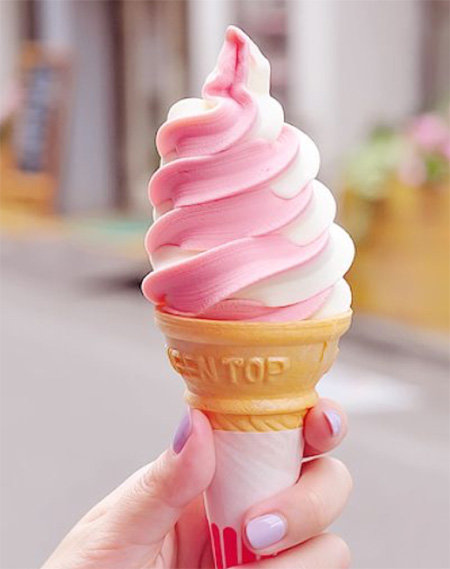

In [ ]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "chocolate.jpg"

# Preview image for context
display(Image(IMAGE_PATH))

#### Base64 Image Processing

In [ ]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me analyze the nutrition data of a photo of my meal"},
        {"role": "user", "content": [
            {"type": "text", "text": "Could you analyze the nutrition data of my meal in Korean?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

이 사진은 소프트 아이스크림입니다. 일반적인 소프트 아이스크림의 영양 정보를 제공해드릴게요.

### 소프트 아이스크림 (약 100g 기준)
- **칼로리**: 약 200-250 kcal
- **탄수화물**: 약 20-30g
- **당류**: 약 15-20g
- **단백질**: 약 3-5g
- **지방**: 약 10-15g
- **포화지방**: 약 6-10g
- **콜레스테롤**: 약 20-30mg
- **나트륨**: 약 50-100mg

이 수치는 대략적인 값이며, 브랜드나 제조 방법에 따라 다를 수 있습니다. 아이스크림은 당과 지방 함량이 높으니 적당히 섭취하는 것이 좋습니다.


In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me analyze the nutrition data of a photo of my meal"},
        {"role": "user", "content": [
            {"type": "text", "text": "이 음식 사진에서 부족한 영양성분을 보충할 수 있는 메뉴 명을 출력해줘"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

이 도넛은 주로 탄수화물과 당분이 많고, 단백질, 식이섬유, 비타민, 미네랄이 부족할 수 있습니다. 이를 보충하기 위해 다음과 같은 메뉴를 고려해보세요:

1. **그릭 요거트와 견과류**: 단백질과 건강한 지방을 보충할 수 있습니다.
2. **신선한 과일 샐러드**: 비타민과 식이섬유를 추가할 수 있습니다.
3. **삶은 달걀**: 단백질과 비타민 D를 보충할 수 있습니다.
4. **채소 스무디**: 다양한 비타민과 미네랄을 섭취할 수 있습니다.

이 메뉴들을 추가하면 영양 균형을 맞추는 데 도움이 될 것입니다.
